# Add Health Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from itertools import product

## Load and Process Friendship Nomination Data

In [2]:
df = pd.read_csv('school_friends.csv')
df

,Unnamed: 0,sqid,mf1aid,mf2aid,mf3aid,mf4aid,mf5aid,ff1aid,ff2aid,ff3aid,ff4aid,ff5aid
0,1,100002,9.750092e+07,9.154012e+07,9.257071e+07,9.450061e+07,9.954011e+07,9.657092e+07,9.754031e+07,9.357091e+07,9.257002e+07,9.350031e+07
1,2,100003,9.857092e+07,9.850001e+07,9.854022e+07,1.000000e+08,9.357021e+07,9.157032e+07,9.354092e+07,9.454032e+07,9.354032e+07,9.650091e+07
2,3,100005,9.671421e+07,9.371492e+07,9.771402e+07,9.671401e+07,9.871491e+07,9.671412e+07,9.271492e+07,9.571492e+07,9.671422e+07,1.749801e+100
3,4,100008,9.957032e+07,9.657071e+07,9.857001e+07,9.457011e+07,1.749801e+100,9.950071e+07,9.050062e+07,9.254091e+07,9.357072e+07,9.357032e+07
4,5,100009,1.000000e+08,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,7.777778e+07,9.857001e+07,9.750042e+07,9.057011e+07,9.057072e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
90113,90114,999999,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100
90114,90115,999999,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100
90115,90116,999999,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100
90116,90117,999999,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100


In [3]:
df = df.iloc[:,1:]
df

,sqid,mf1aid,mf2aid,mf3aid,mf4aid,mf5aid,ff1aid,ff2aid,ff3aid,ff4aid,ff5aid
0,100002,9.750092e+07,9.154012e+07,9.257071e+07,9.450061e+07,9.954011e+07,9.657092e+07,9.754031e+07,9.357091e+07,9.257002e+07,9.350031e+07
1,100003,9.857092e+07,9.850001e+07,9.854022e+07,1.000000e+08,9.357021e+07,9.157032e+07,9.354092e+07,9.454032e+07,9.354032e+07,9.650091e+07
2,100005,9.671421e+07,9.371492e+07,9.771402e+07,9.671401e+07,9.871491e+07,9.671412e+07,9.271492e+07,9.571492e+07,9.671422e+07,1.749801e+100
3,100008,9.957032e+07,9.657071e+07,9.857001e+07,9.457011e+07,1.749801e+100,9.950071e+07,9.050062e+07,9.254091e+07,9.357072e+07,9.357032e+07
4,100009,1.000000e+08,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,7.777778e+07,9.857001e+07,9.750042e+07,9.057011e+07,9.057072e+07
...,...,...,...,...,...,...,...,...,...,...,...
90113,999999,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100
90114,999999,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100
90115,999999,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100
90116,999999,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100


In [4]:
df = df[df['sqid']<800000]
df

,sqid,mf1aid,mf2aid,mf3aid,mf4aid,mf5aid,ff1aid,ff2aid,ff3aid,ff4aid,ff5aid
0,100002,9.750092e+07,9.154012e+07,9.257071e+07,9.450061e+07,9.954011e+07,9.657092e+07,9.754031e+07,9.357091e+07,9.257002e+07,9.350031e+07
1,100003,9.857092e+07,9.850001e+07,9.854022e+07,1.000000e+08,9.357021e+07,9.157032e+07,9.354092e+07,9.454032e+07,9.354032e+07,9.650091e+07
2,100005,9.671421e+07,9.371492e+07,9.771402e+07,9.671401e+07,9.871491e+07,9.671412e+07,9.271492e+07,9.571492e+07,9.671422e+07,1.749801e+100
3,100008,9.957032e+07,9.657071e+07,9.857001e+07,9.457011e+07,1.749801e+100,9.950071e+07,9.050062e+07,9.254091e+07,9.357072e+07,9.357032e+07
4,100009,1.000000e+08,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,7.777778e+07,9.857001e+07,9.750042e+07,9.057011e+07,9.057072e+07
...,...,...,...,...,...,...,...,...,...,...,...
89935,539914,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100
89936,546404,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,9.271029e+07,7.777778e+07,7.777778e+07,1.749801e+100,1.749801e+100
89937,678452,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100
89938,732172,9.467652e+07,9.160602e+07,9.660683e+07,9.460603e+07,9.460652e+07,9.460683e+07,1.000000e+08,8.888889e+07,1.749801e+100,1.749801e+100


In [5]:
df[['mf1aid','mf2aid','ff1aid','ff2aid']]

,mf1aid,mf2aid,ff1aid,ff2aid
0,9.750092e+07,9.154012e+07,9.657092e+07,9.754031e+07
1,9.857092e+07,9.850001e+07,9.157032e+07,9.354092e+07
2,9.671421e+07,9.371492e+07,9.671412e+07,9.271492e+07
3,9.957032e+07,9.657071e+07,9.950071e+07,9.050062e+07
4,1.000000e+08,1.749801e+100,7.777778e+07,9.857001e+07
...,...,...,...,...
89935,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100
89936,1.749801e+100,1.749801e+100,9.271029e+07,7.777778e+07
89937,1.749801e+100,1.749801e+100,1.749801e+100,1.749801e+100
89938,9.467652e+07,9.160602e+07,9.460683e+07,1.000000e+08


In [6]:
df = df[~df['mf1aid'].isin([77777777,88888888,99999999,99959995])]
df = df[df['mf1aid']<1e8]
df = df[~df['ff1aid'].isin([77777777,88888888,99999999,99959995])]
df = df[df['ff1aid']<1e8]
df = df.dropna()
friendship_df = df[['sqid','mf1aid','ff1aid']]
friendship_df

,sqid,mf1aid,ff1aid
0,100002,97500917.0,96570918.0
1,100003,98570915.0,91570318.0
2,100005,96714212.0,96714116.0
3,100008,99570318.0,99500711.0
6,100011,95714215.0,95714311.0
...,...,...,...
89924,280596,94316859.0,98316357.0
89929,280652,95508363.0,96508065.0
89930,288860,96716339.0,99716137.0
89933,511654,94575122.0,99575223.0


## Load and Process In School Responses

In [7]:
df = pd.read_csv('in_school_data.csv')
df

,Unnamed: 0,sqid,aid,sschlcde,kidwgt,kidwgtps,s1,s2,s3,s4,...,s62o,s62p,s62q,s62r,s63,s64,s65,s66,s67,s68
0,1,100002,94500018.0,44,78.423500,125.941101,16.0,1.0,11.0,0.0,...,2.0,2.0,1.0,3.0,1.0,0.0,0.0,1,1,1
1,2,100003,90500118.0,44,77.887299,112.197998,16.0,1.0,10.0,0.0,...,3.0,1.0,1.0,1.0,4.0,0.0,1.0,0,0,0
2,3,100005,97714017.0,164,933.695129,1440.718750,13.0,1.0,8.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,4,100008,92570219.0,44,82.214500,117.073303,14.0,2.0,9.0,0.0,...,2.0,2.0,2.0,3.0,3.0,0.0,0.0,0,0,0
4,5,100009,99570813.0,44,74.580803,123.789398,17.0,2.0,10.0,1.0,...,2.0,4.0,2.0,2.0,1.0,0.0,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90113,90114,999999,NaN,271,94.488701,133.693893,15.0,1.0,9.0,0.0,...,2.0,2.0,4.0,4.0,2.0,1.0,0.0,0,0,0
90114,90115,999999,NaN,271,94.488701,133.693893,15.0,1.0,9.0,1.0,...,2.0,3.0,5.0,5.0,2.0,3.0,1.0,0,0,0
90115,90116,999999,NaN,271,72.219002,119.869102,15.0,2.0,10.0,1.0,...,2.0,2.0,4.0,4.0,1.0,1.0,1.0,0,0,0
90116,90117,999999,NaN,371,NaN,NaN,13.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [8]:
df = df.dropna(subset=['sqid', 'aid', 's59b', 's10b', 's1', 's2', 's50', 's60j','s46b','s46c','s59g','s60b','s60k','s61a','s12','s18']).iloc[:,1:]
df

,sqid,aid,sschlcde,kidwgt,kidwgtps,s1,s2,s3,s4,s5,...,s62o,s62p,s62q,s62r,s63,s64,s65,s66,s67,s68
1,100003,90500118.0,44,77.887299,112.197998,16.0,1.0,10.0,0.0,97.0,...,3.0,1.0,1.0,1.0,4.0,0.0,1.0,0,0,0
3,100008,92570219.0,44,82.214500,117.073303,14.0,2.0,9.0,0.0,97.0,...,2.0,2.0,2.0,3.0,3.0,0.0,0.0,0,0,0
5,100010,94573610.0,84,155.710602,250.057404,16.0,1.0,11.0,8.0,97.0,...,3.0,2.0,2.0,2.0,3.0,0.0,0.0,1,1,1
8,100014,97570011.0,44,74.580803,123.789398,15.0,2.0,10.0,1.0,1.0,...,2.0,2.0,1.0,2.0,1.0,0.0,0.0,0,0,0
9,100015,94540214.0,44,78.423500,125.941101,17.0,1.0,11.0,0.0,97.0,...,2.0,2.0,2.0,2.0,4.0,1.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89923,280595,93316457.0,371,73.991997,114.374603,12.0,1.0,7.0,1.0,1.0,...,2.0,2.0,2.0,2.0,4.0,3.0,0.0,1,1,1
89924,280596,93316153.0,371,73.991997,114.374603,12.0,1.0,7.0,0.0,97.0,...,1.0,4.0,2.0,4.0,3.0,0.0,0.0,1,1,1
89925,280597,98316357.0,371,71.297798,109.663696,13.0,2.0,7.0,1.0,1.0,...,2.0,2.0,3.0,3.0,1.0,0.0,1.0,1,0,1
89926,280598,93316355.0,371,73.991997,114.374603,12.0,1.0,7.0,0.0,97.0,...,1.0,1.0,1.0,2.0,4.0,1.0,0.0,1,1,1


## Analyses

### Adjacency Matrix

In [9]:
adjacency = friendship_df.merge(df[['sqid','aid','sschlcde']],on='sqid',how='inner')
adjacency

,sqid,mf1aid,ff1aid,aid,sschlcde
0,100003,98570915.0,91570318.0,90500118.0,44
1,100008,99570318.0,99500711.0,92570219.0,44
2,100017,99540318.0,90570810.0,98570713.0,44
3,100028,95504043.0,99504947.0,96504240.0,68
4,100029,96573519.0,97573213.0,92573911.0,84
...,...,...,...,...,...
26138,280578,92678879.0,92608371.0,95608075.0,259
26139,280580,98678971.0,92678775.0,97678675.0,259
26140,280589,98316258.0,92316451.0,99316659.0,371
26141,280591,93577859.0,90577952.0,96577451.0,91


In [10]:
adjacency = adjacency.merge(df[['sqid','aid','sschlcde']],left_on='mf1aid',right_on='aid',how='inner', suffixes=(None, '_mf'))
adjacency = adjacency.merge(df[['sqid','aid','sschlcde']],left_on='ff1aid',right_on='aid',how='inner', suffixes=(None, '_ff'))
adjacency

,sqid,mf1aid,ff1aid,aid,sschlcde,sqid_mf,aid_mf,sschlcde_mf,sqid_ff,aid_ff,sschlcde_ff
0,100017,99540318.0,90570810.0,98570713.0,44,118031,99540318.0,44,226742,90570810.0,44
1,111042,98540317.0,90570810.0,95500913.0,44,225666,98540317.0,44,226742,90570810.0,44
2,100047,96573510.0,92573817.0,96573513.0,84,222447,96573510.0,84,202282,92573817.0,84
3,100052,90573917.0,98573116.0,94573416.0,84,277823,90573917.0,84,111047,98573116.0,84
4,202278,92573912.0,98573116.0,96573311.0,84,226294,92573912.0,84,111047,98573116.0,84
...,...,...,...,...,...,...,...,...,...,...,...
13903,280432,93316454.0,92316859.0,96316957.0,371,210207,93316454.0,371,144248,92316859.0,371
13904,280468,91676522.0,99676922.0,92606627.0,270,110574,91676522.0,270,100527,99676922.0,270
13905,280578,92678879.0,92608371.0,95608075.0,259,210395,92678879.0,259,210335,92608371.0,259
13906,280591,93577859.0,90577952.0,96577451.0,91,194117,93577859.0,91,111311,90577952.0,91


### School Attendance

In [11]:
np.mean(adjacency['sschlcde'] == adjacency['sschlcde_ff'])

0.9852602818521714

In [12]:
np.mean(adjacency['sschlcde'] == adjacency['sschlcde_mf'])

0.9788610871440897

In [13]:
np.mean((adjacency['sschlcde'] == adjacency['sschlcde_mf']) & (adjacency['sschlcde'] == adjacency['sschlcde_ff']))

0.9685792349726776

#### In sampled data, most students go to the same school as their best friends. 

In [14]:
len(list(set(adjacency['aid']).intersection(set(adjacency['mf1aid']))))

3537

In [15]:
len(list(set(adjacency['aid']).intersection(set(adjacency['ff1aid']))))

3531

#### In sampled data, about half of the egos also appear as best friends, while others are not nominated as best friends.

In [16]:
mf_counts = adjacency['mf1aid'].value_counts()
ff_counts = adjacency['ff1aid'].value_counts()

In [17]:
np.mean(ff_counts <= 1)

0.7222278175042804

In [18]:
np.mean(mf_counts <= 1)

0.6835429769392034

#### Among the alters, about 70% are only nominated once. 

In [19]:
sub_adjacency = adjacency.sample(n=3000)

In [20]:
len(list(set(sub_adjacency['aid']).intersection(set(sub_adjacency['mf1aid']))))

238

In [21]:
len(list(set(sub_adjacency['aid']).intersection(set(sub_adjacency['ff1aid']))))

222

In [22]:
mf_counts = sub_adjacency['mf1aid'].value_counts()
ff_counts = sub_adjacency['ff1aid'].value_counts()

In [23]:
mf_counts

92614378.0    4
91507256.0    4
94572165.0    3
91578632.0    3
95500925.0    3
             ..
91570427.0    1
91570193.0    1
98575220.0    1
91711167.0    1
99507155.0    1
Name: mf1aid, Length: 2712, dtype: int64

In [24]:
np.mean(mf_counts <= 1)

0.9033923303834809

In [25]:
np.mean(ff_counts <= 1)

0.9142335766423357

### Visualizations

In [26]:
import networkx as nx
G = nx.Graph()
def add_edges(mf, ff, self, graph):
    graph.add_edge(mf,self)
    graph.add_edge(ff,self)
#adjacency.iloc[700:720,:].apply(lambda df: add_edges(df.mf1aid, df.ff1aid, df.aid, G),axis=1)
adjacency.sample(n=15).apply(lambda df: add_edges(df.mf1aid, df.ff1aid, df.aid, G),axis=1)

5226     None
5550     None
7729     None
7731     None
5115     None
126      None
2973     None
13627    None
9926     None
10184    None
13856    None
5467     None
4811     None
7822     None
4345     None
dtype: object

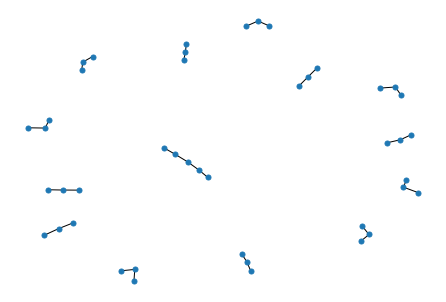

In [27]:
options = {
    'node_size': 25,
    'width': 1,
}
nx.draw(G, **options)
#nx.draw(G, **options)
#nx.draw_networkx_nodes(G,pos=nx.spring_layout(G),node_color='#00b4d9')
plt.plot()
plt.show()

### Smoking Status 

In [28]:
smoke = adjacency[['aid','mf1aid','ff1aid']].merge(df[['aid','s59b']], on='aid')
smoke 

,aid,mf1aid,ff1aid,s59b
0,98570713.0,99540318.0,90570810.0,4.0
1,95500913.0,98540317.0,90570810.0,4.0
2,96573513.0,96573510.0,92573817.0,0.0
3,94573416.0,90573917.0,98573116.0,1.0
4,96573311.0,92573912.0,98573116.0,1.0
...,...,...,...,...
13903,96316957.0,93316454.0,92316859.0,0.0
13904,92606627.0,91676522.0,99676922.0,1.0
13905,95608075.0,92678879.0,92608371.0,1.0
13906,96577451.0,93577859.0,90577952.0,1.0


In [29]:
smoke = smoke.merge(df[['aid','s59b']], left_on='mf1aid', right_on='aid', suffixes=(None,'_mf'))
smoke = smoke.merge(df[['aid','s59b']], left_on='ff1aid', right_on='aid', suffixes=(None,'_ff'))
smoke

,aid,mf1aid,ff1aid,s59b,aid_mf,s59b_mf,aid_ff,s59b_ff
0,98570713.0,99540318.0,90570810.0,4.0,99540318.0,4.0,90570810.0,3.0
1,95500913.0,98540317.0,90570810.0,4.0,98540317.0,4.0,90570810.0,3.0
2,96573513.0,96573510.0,92573817.0,0.0,96573510.0,4.0,92573817.0,1.0
3,94573416.0,90573917.0,98573116.0,1.0,90573917.0,0.0,98573116.0,1.0
4,96573311.0,92573912.0,98573116.0,1.0,92573912.0,1.0,98573116.0,1.0
...,...,...,...,...,...,...,...,...
13903,96316957.0,93316454.0,92316859.0,0.0,93316454.0,0.0,92316859.0,0.0
13904,92606627.0,91676522.0,99676922.0,1.0,91676522.0,2.0,99676922.0,4.0
13905,95608075.0,92678879.0,92608371.0,1.0,92678879.0,2.0,92608371.0,1.0
13906,96577451.0,93577859.0,90577952.0,1.0,93577859.0,0.0,90577952.0,0.0


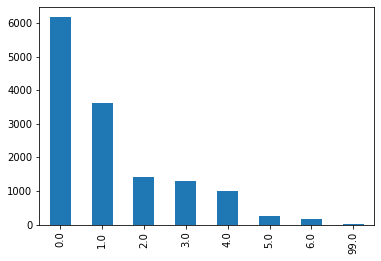

In [30]:
smoke['s59b'].value_counts().plot.bar(x=['non_smoker','smoker'])
plt.show()

In [31]:
smoke = smoke[smoke['s59b']<99]
smoke['smoked'] = (smoke['s59b'] > 0).astype(int)
smoke['smoked_mf'] = (smoke['s59b_mf'] > 0).astype(int)
smoke['smoked_ff'] = (smoke['s59b_ff'] > 0).astype(int)
smoke['regular_smoker'] = (smoke['s59b'] > 2).astype(int)
smoke['regular_smoker_mf'] = (smoke['s59b_mf'] > 2).astype(int)
smoke['regular_smoker_ff'] = (smoke['s59b_ff'] > 2).astype(int)

smoke

/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is 

,aid,mf1aid,ff1aid,s59b,aid_mf,s59b_mf,aid_ff,s59b_ff,smoked,smoked_mf,smoked_ff,regular_smoker,regular_smoker_mf,regular_smoker_ff
0,98570713.0,99540318.0,90570810.0,4.0,99540318.0,4.0,90570810.0,3.0,1,1,1,1,1,1
1,95500913.0,98540317.0,90570810.0,4.0,98540317.0,4.0,90570810.0,3.0,1,1,1,1,1,1
2,96573513.0,96573510.0,92573817.0,0.0,96573510.0,4.0,92573817.0,1.0,0,1,1,0,1,0
3,94573416.0,90573917.0,98573116.0,1.0,90573917.0,0.0,98573116.0,1.0,1,0,1,0,0,0
4,96573311.0,92573912.0,98573116.0,1.0,92573912.0,1.0,98573116.0,1.0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13903,96316957.0,93316454.0,92316859.0,0.0,93316454.0,0.0,92316859.0,0.0,0,0,0,0,0,0
13904,92606627.0,91676522.0,99676922.0,1.0,91676522.0,2.0,99676922.0,4.0,1,1,1,0,0,1
13905,95608075.0,92678879.0,92608371.0,1.0,92678879.0,2.0,92608371.0,1.0,1,1,1,0,0,0
13906,96577451.0,93577859.0,90577952.0,1.0,93577859.0,0.0,90577952.0,0.0,1,0,0,0,0,0


In [32]:
np.mean(smoke['regular_smoker']==0)

0.805249910104279

In [33]:
np.mean(smoke['regular_smoker_ff']==0)

0.8282632146709816

In [34]:
np.mean(smoke['regular_smoker_mf']==0)

0.7386551600143834

#### In the sample, about 80% are non-smokers.

In [35]:
len(smoke[(smoke['s59b']==0) & (smoke['s59b_mf']==0) & (smoke['s59b_ff']==0)])/len(smoke[(smoke['s59b']==0)])

0.3283024991885751

#### Among non-smokers, 68% have at least one friend who smokes.

In [36]:
len(smoke[(smoke['s59b']>0) & (smoke['s59b_mf']==0) & (smoke['s59b_ff']==0)])/len(smoke[(smoke['s59b']>0)])

0.11842954927030866

#### Among smokers, 89% have at least one friend who smokes.

## Estimations of direct and peer effects with regression and classical IPW

In [37]:
raw_features = ['aid','s10b','s1','s2','s50','s60j','s46b','s46c','s59g','s60b','s60k','s61a','s12','s18'] 
features = ['aid', 'math_grade', 'age', 'gender', 'health', 'sleep', 'attention', 'homework', 'truancy', 'tired', 'depressed','missed_school','mother_graduated_college','father_graduated_college']
features_df = df[raw_features]
features_df.columns = features

# delete invalid responses
features_df = features_df[features_df['math_grade']<5]
features_df = features_df[~features_df.eq(9).any(1)]

features_df = features_df[features_df['age']<99]
features_df = features_df[features_df['gender']<9]
features_df = features_df[features_df['truancy']<99]
features_df = features_df[features_df['missed_school']<9]

# process parents' education levels
features_df['mother_graduated_college'] = ((features_df['mother_graduated_college']==7) | (features_df['mother_graduated_college']==8)).astype(int)
features_df['father_graduated_college'] = ((features_df['father_graduated_college']==7) | (features_df['father_graduated_college']==8)).astype(int)

# binarize math grade
features_df['math_grade'] = (features_df['math_grade'] <=2).astype(int)

features_df

,aid,math_grade,age,gender,health,sleep,attention,homework,truancy,tired,depressed,missed_school,mother_graduated_college,father_graduated_college
1,90500118.0,0,16.0,1.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,0.0,1,1
3,92570219.0,0,14.0,2.0,2.0,3.0,2.0,1.0,1.0,3.0,2.0,0.0,0,0
5,94573610.0,1,16.0,1.0,3.0,2.0,4.0,3.0,0.0,3.0,1.0,1.0,0,0
11,98570713.0,0,16.0,2.0,3.0,2.0,1.0,3.0,3.0,3.0,2.0,1.0,0,0
13,91573218.0,0,14.0,1.0,3.0,2.0,2.0,3.0,0.0,4.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89920,90316856.0,0,13.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1
89922,96316152.0,0,13.0,1.0,1.0,2.0,3.0,3.0,0.0,2.0,0.0,1.0,0,0
89924,93316153.0,0,12.0,1.0,3.0,1.0,0.0,1.0,2.0,4.0,1.0,0.0,0,1
89925,98316357.0,1,13.0,2.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,0


In [38]:
# merge ego's features 

#test_df = features_df.merge(smoke[['aid','mf1aid','ff1aid','s59a','s59a_mf','s59a_ff','regular_smoker','regular_smoker_mf','regular_smoker_ff']],on='aid')
#test_df = test_df.rename(columns={'s59a':'smoke','s59a_mf':'smoke_mf','s59a_ff':'smoke_ff'})

test_df = features_df.merge(smoke[['aid','mf1aid','ff1aid','regular_smoker','regular_smoker_mf','regular_smoker_ff']],on='aid')
test_df = test_df.rename(columns={'regular_smoker':'smoke','regular_smoker_mf':'smoke_mf','regular_smoker_ff':'smoke_ff'})
test_df['intercept'] = 1
test_df = test_df.dropna()
test_df

,aid,math_grade,age,gender,health,sleep,attention,homework,truancy,tired,depressed,missed_school,mother_graduated_college,father_graduated_college,mf1aid,ff1aid,smoke,smoke_mf,smoke_ff,intercept
0,98570713.0,0,16.0,2.0,3.0,2.0,1.0,3.0,3.0,3.0,2.0,1.0,0,0,99540318.0,90570810.0,1,1,1,1
1,96573513.0,1,16.0,1.0,3.0,2.0,1.0,1.0,0.0,3.0,2.0,1.0,1,1,96573510.0,92573817.0,0,1,0,1
2,94573416.0,1,12.0,2.0,4.0,3.0,4.0,1.0,0.0,4.0,4.0,0.0,0,0,90573917.0,98573116.0,0,0,0,1
3,94714025.0,1,14.0,1.0,2.0,0.0,3.0,3.0,0.0,2.0,1.0,0.0,0,0,97714320.0,99714225.0,0,0,0,1
4,94575152.0,1,16.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0,0,96575351.0,93575954.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11202,99608877.0,1,18.0,2.0,2.0,3.0,2.0,1.0,1.0,3.0,2.0,0.0,1,1,90608171.0,92678070.0,0,0,0,1
11203,95608075.0,0,16.0,2.0,1.0,4.0,1.0,2.0,1.0,4.0,4.0,0.0,1,1,92678879.0,92608371.0,0,0,0,1
11204,99316659.0,0,13.0,2.0,2.0,0.0,1.0,1.0,0.0,2.0,1.0,2.0,0,0,98316258.0,92316451.0,0,0,0,1
11205,96577451.0,1,17.0,2.0,3.0,2.0,3.0,3.0,0.0,3.0,3.0,1.0,0,0,93577859.0,90577952.0,0,0,0,1


In [39]:
# add friends' features and add number of smoking friends as a feature column
test_df = test_df.merge(features_df,left_on='mf1aid', right_on='aid',suffixes=(None,'_mf'))
test_df = test_df.merge(features_df,left_on='ff1aid', right_on='aid',suffixes=(None,'_ff'))
test_df['smoking_friends'] = test_df['smoke_mf'] + test_df['smoke_ff']
test_df

,aid,math_grade,age,gender,health,sleep,attention,homework,truancy,tired,...,sleep_ff,attention_ff,homework_ff,truancy_ff,tired_ff,depressed_ff,missed_school_ff,mother_graduated_college_ff,father_graduated_college_ff,smoking_friends
0,98570713.0,0,16.0,2.0,3.0,2.0,1.0,3.0,3.0,3.0,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,0,0,2
1,95500913.0,0,17.0,1.0,3.0,3.0,3.0,3.0,2.0,4.0,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,0,0,2
2,94573416.0,1,12.0,2.0,4.0,3.0,4.0,1.0,0.0,4.0,...,1.0,1.0,1.0,0.0,3.0,2.0,0.0,0,0,0
3,94714025.0,1,14.0,1.0,2.0,0.0,3.0,3.0,0.0,2.0,...,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0,0,0
4,94575152.0,1,16.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,...,2.0,2.0,1.0,0.0,4.0,2.0,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,98715227.0,0,13.0,1.0,4.0,4.0,4.0,4.0,0.0,3.0,...,3.0,3.0,4.0,0.0,3.0,1.0,0.0,1,0,1
7901,94506398.0,0,16.0,1.0,2.0,0.0,1.0,2.0,1.0,0.0,...,0.0,3.0,4.0,2.0,2.0,2.0,1.0,0,0,0
7902,99316659.0,0,13.0,2.0,2.0,0.0,1.0,1.0,0.0,2.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0,0,0
7903,96577451.0,1,17.0,2.0,3.0,2.0,3.0,3.0,0.0,3.0,...,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0,0,0


In [40]:
# we will use friends' math grades to adjust for confounding
test_df[['math_grade','math_grade_mf','math_grade_ff']]

,math_grade,math_grade_mf,math_grade_ff
0,0,1,0
1,0,0,0
2,1,1,1
3,1,1,1
4,1,1,0
...,...,...,...
7900,0,0,0
7901,0,0,1
7902,0,1,1
7903,1,0,1


In [41]:
len(test_df[test_df['smoking_friends']==2])

558

In [42]:
len(test_df[test_df['smoking_friends']==1])

2290

In [43]:
len(test_df[test_df['smoking_friends']==0])

5057

In [44]:
np.mean(test_df[(test_df['smoking_friends']==0) & (test_df['smoke']==0)]['math_grade'])

0.7136524822695035

In [45]:
np.mean(test_df[(test_df['smoking_friends']==0) & (test_df['smoke']==1)]['math_grade'])

0.6220183486238532

In [46]:
np.mean(test_df[(test_df['smoking_friends']==1) & (test_df['smoke']==0)]['math_grade'])

0.7071207430340557

In [47]:
np.mean(test_df[(test_df['smoking_friends']==1) & (test_df['smoke']==1)]['math_grade'])

0.5762962962962963

In [48]:
np.mean(test_df[(test_df['smoking_friends']==2) & (test_df['smoke']==0)]['math_grade'])

0.6442687747035574

In [49]:
np.mean(test_df[(test_df['smoking_friends']==2) & (test_df['smoke']==1)]['math_grade'])

0.5475409836065573

#### In the sample, 5057 students have non-smoking best friends, 2290 have exactly one non-smoking best friend, while 558 have best friends who both smoke. 

In [50]:
# add indicators of number of smoking friends and interaction terms
test_df['1_smoker_friend'] = (test_df['smoking_friends']==1).astype('int64')
test_df['2_smoker_friend'] = (test_df['smoking_friends']==2).astype('int64')
test_df['smoke_with_0_smoker_friend'] = test_df['smoke']*(test_df['smoking_friends']==0)
test_df['smoke_with_1_smoker_friend'] = test_df['smoke']*(test_df['smoking_friends']==1)
test_df['smoke_with_2_smoker_friend'] = test_df['smoke']*(test_df['smoking_friends']==2)

test_df

,aid,math_grade,age,gender,health,sleep,attention,homework,truancy,tired,...,depressed_ff,missed_school_ff,mother_graduated_college_ff,father_graduated_college_ff,smoking_friends,1_smoker_friend,2_smoker_friend,smoke_with_0_smoker_friend,smoke_with_1_smoker_friend,smoke_with_2_smoker_friend
0,98570713.0,0,16.0,2.0,3.0,2.0,1.0,3.0,3.0,3.0,...,1.0,1.0,0,0,2,0,1,0,0,1
1,95500913.0,0,17.0,1.0,3.0,3.0,3.0,3.0,2.0,4.0,...,1.0,1.0,0,0,2,0,1,0,0,1
2,94573416.0,1,12.0,2.0,4.0,3.0,4.0,1.0,0.0,4.0,...,2.0,0.0,0,0,0,0,0,0,0,0
3,94714025.0,1,14.0,1.0,2.0,0.0,3.0,3.0,0.0,2.0,...,0.0,0.0,0,0,0,0,0,0,0,0
4,94575152.0,1,16.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,...,2.0,1.0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,98715227.0,0,13.0,1.0,4.0,4.0,4.0,4.0,0.0,3.0,...,1.0,0.0,1,0,1,1,0,0,0,0
7901,94506398.0,0,16.0,1.0,2.0,0.0,1.0,2.0,1.0,0.0,...,2.0,1.0,0,0,0,0,0,0,0,0
7902,99316659.0,0,13.0,2.0,2.0,0.0,1.0,1.0,0.0,2.0,...,1.0,0.0,0,0,0,0,0,0,0,0
7903,96577451.0,1,17.0,2.0,3.0,2.0,3.0,3.0,0.0,3.0,...,1.0,0.0,0,0,0,0,0,0,0,0


In [51]:
#test_df = test_df.sample(frac=0.7)
test_df

,aid,math_grade,age,gender,health,sleep,attention,homework,truancy,tired,...,depressed_ff,missed_school_ff,mother_graduated_college_ff,father_graduated_college_ff,smoking_friends,1_smoker_friend,2_smoker_friend,smoke_with_0_smoker_friend,smoke_with_1_smoker_friend,smoke_with_2_smoker_friend
0,98570713.0,0,16.0,2.0,3.0,2.0,1.0,3.0,3.0,3.0,...,1.0,1.0,0,0,2,0,1,0,0,1
1,95500913.0,0,17.0,1.0,3.0,3.0,3.0,3.0,2.0,4.0,...,1.0,1.0,0,0,2,0,1,0,0,1
2,94573416.0,1,12.0,2.0,4.0,3.0,4.0,1.0,0.0,4.0,...,2.0,0.0,0,0,0,0,0,0,0,0
3,94714025.0,1,14.0,1.0,2.0,0.0,3.0,3.0,0.0,2.0,...,0.0,0.0,0,0,0,0,0,0,0,0
4,94575152.0,1,16.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,...,2.0,1.0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,98715227.0,0,13.0,1.0,4.0,4.0,4.0,4.0,0.0,3.0,...,1.0,0.0,1,0,1,1,0,0,0,0
7901,94506398.0,0,16.0,1.0,2.0,0.0,1.0,2.0,1.0,0.0,...,2.0,1.0,0,0,0,0,0,0,0,0
7902,99316659.0,0,13.0,2.0,2.0,0.0,1.0,1.0,0.0,2.0,...,1.0,0.0,0,0,0,0,0,0,0,0
7903,96577451.0,1,17.0,2.0,3.0,2.0,3.0,3.0,0.0,3.0,...,1.0,0.0,0,0,0,0,0,0,0,0


### Linear Regression

In [52]:
# extension of linear regression with standard error and p values
from sklearn import linear_model
from scipy import stats
import numpy as np

class LinearRegression(linear_model.LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (y.shape[1], X.shape[1])
    which is (n_features, n_coefs)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """

    def __init__(self, *args, **kwargs):
        if not "fit_intercept" in kwargs:
            kwargs['fit_intercept'] = False
        super(LinearRegression, self).__init__(*args, **kwargs)

    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)

        sse = np.sum((self.predict(X) - y) ** 2) / float(X.shape[0] - X.shape[1])
        se = np.asarray(np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X)))))

        self.t = self.coef_ / se
        self.p = 2 * (1 - stats.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1]))
        self.se = se
        return self

### math grade ~ smoking status, intercept

In [53]:
reg = LinearRegression().fit(test_df[['smoke','intercept']], test_df['math_grade'])
regression_result = pd.DataFrame([])
regression_result['variable'] = ['smoke','intercept']
regression_result['coefficient'] = reg.coef_
regression_result['standard error'] = reg.se
regression_result['t statistics'] = reg.t
regression_result['p value'] = reg.p
regression_result

,variable,coefficient,standard error,t statistics,p value
0,smoke,-0.122362,0.013163,-9.295823,0.0
1,intercept,0.709248,0.005782,122.674348,0.0


In [54]:
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

/home/users/zhaonanq/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [55]:
ate_1 = sm.OLS(test_df['math_grade'],test_df[['smoke','intercept']]).fit()
print(summary_col([ate_1],stars=True,float_format='%0.3f'))


          math_grade
--------------------
smoke     -0.122*** 
          (0.013)   
intercept 0.709***  
          (0.006)   
Standard errors in
parentheses.
* p<.1, ** p<.05,
***p<.01


#### conditional on smoking friends>0

In [56]:
sub_df = test_df[test_df['smoking_friends']>0]
reg = LinearRegression().fit(sub_df[['smoke','intercept']], sub_df['math_grade'])
regression_result = pd.DataFrame([])
regression_result['variable'] = ['smoke','intercept']
regression_result['coefficient'] = reg.coef_
regression_result['standard error'] = reg.se
regression_result['t statistics'] = reg.t
regression_result['p value'] = reg.p
regression_result

,variable,coefficient,standard error,t statistics,p value
0,smoke,-0.131261,0.018615,-7.051552,2.212008e-12
1,intercept,0.698608,0.010919,63.979216,0.000000e+00


#### add number of smoking friends

In [57]:
reg = LinearRegression().fit(test_df[['smoking_friends','smoke','intercept']], test_df['math_grade'])
regression_result = pd.DataFrame([])
regression_result['variable'] = ['smoking_friends','smoke','intercept']
regression_result['coefficient'] = reg.coef_
regression_result['standard error'] = reg.se
regression_result['t statistics'] = reg.t
regression_result['p value'] = reg.p
regression_result

,variable,coefficient,standard error,t statistics,p value
0,smoking_friends,-0.024674,0.008828,-2.795003,5.202438e-03
1,smoke,-0.109774,0.013907,-7.893466,3.330669e-15
2,intercept,0.717450,0.006482,110.691055,0.000000e+00


In [58]:
ate_2 = sm.OLS(test_df['math_grade'],test_df[['smoking_friends','smoke','intercept']]).fit()
print(summary_col([ate_2],stars=True,float_format='%0.3f'))


                math_grade
--------------------------
smoking_friends -0.025*** 
                (0.009)   
smoke           -0.110*** 
                (0.014)   
intercept       0.717***  
                (0.006)   
Standard errors in
parentheses.
* p<.1, ** p<.05, ***p<.01


#### add covariates

In [59]:
covariates = ['age', 'gender', 'truancy', 'missed_school', 'mother_graduated_college', 'father_graduated_college']

In [60]:
test_df[covariates+['smoke','intercept']]

,age,gender,truancy,missed_school,mother_graduated_college,father_graduated_college,smoke,intercept
0,16.0,2.0,3.0,1.0,0,0,1,1
1,17.0,1.0,2.0,3.0,1,1,1,1
2,12.0,2.0,0.0,0.0,0,0,0,1
3,14.0,1.0,0.0,0.0,0,0,0,1
4,16.0,1.0,0.0,1.0,0,0,1,1
...,...,...,...,...,...,...,...,...
7900,13.0,1.0,0.0,1.0,0,0,0,1
7901,16.0,1.0,1.0,0.0,0,0,0,1
7902,13.0,2.0,0.0,2.0,0,0,0,1
7903,17.0,2.0,0.0,1.0,0,0,0,1


In [61]:
reg = LinearRegression().fit(test_df[covariates+['smoke','intercept']], test_df['math_grade'])
regression_result = pd.DataFrame([])
regression_result['variable'] = covariates+['smoke','intercept']
regression_result['coefficient'] = reg.coef_
regression_result['standard error'] = reg.se
regression_result['t statistics'] = reg.t
regression_result['p value'] = reg.p
regression_result

,variable,coefficient,standard error,t statistics,p value
0,age,-0.019515,0.003432,-5.686032,1.346589e-08
1,gender,0.030292,0.010256,2.953660,3.149561e-03
2,truancy,-0.032469,0.005866,-5.535391,3.204906e-08
3,missed_school,-0.085535,0.009252,-9.245041,0.000000e+00
4,mother_graduated_college,0.081362,0.012029,6.763928,1.438760e-11
5,father_graduated_college,0.066343,0.011985,5.535613,3.200865e-08
6,smoke,-0.055266,0.013926,-3.968507,7.296486e-05
7,intercept,0.942643,0.054771,17.210586,0.000000e+00


In [62]:
ate_3 = sm.OLS(test_df['math_grade'],test_df[covariates+['smoke','intercept']]).fit()
print(summary_col([ate_3],stars=True,float_format='%0.3f'))


                         math_grade
-----------------------------------
age                      -0.020*** 
                         (0.003)   
gender                   0.030***  
                         (0.010)   
truancy                  -0.032*** 
                         (0.006)   
missed_school            -0.086*** 
                         (0.009)   
mother_graduated_college 0.081***  
                         (0.012)   
father_graduated_college 0.066***  
                         (0.012)   
smoke                    -0.055*** 
                         (0.014)   
intercept                0.943***  
                         (0.055)   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


#### add number of smoking friends AND covariates

In [63]:
reg = LinearRegression().fit(test_df[['smoking_friends']+covariates+['smoke','intercept']], test_df['math_grade'])
regression_result = pd.DataFrame([])
regression_result['variable'] = ['smoking_friends']+covariates+['smoke','intercept']
regression_result['coefficient'] = reg.coef_
regression_result['standard error'] = reg.se
regression_result['t statistics'] = reg.t
regression_result['p value'] = reg.p
regression_result

,variable,coefficient,standard error,t statistics,p value
0,smoking_friends,-0.008199,0.008770,-0.934910,3.498634e-01
1,age,-0.019071,0.003465,-5.504239,3.823941e-08
2,gender,0.030761,0.010268,2.995726,2.746428e-03
3,truancy,-0.032117,0.005878,-5.464255,4.790205e-08
4,missed_school,-0.085361,0.009254,-9.224299,0.000000e+00
5,mother_graduated_college,0.081315,0.012029,6.759872,1.479372e-11
6,father_graduated_college,0.066133,0.011987,5.517055,3.556373e-08
7,smoke,-0.051678,0.014445,-3.577538,3.489234e-04
8,intercept,0.937952,0.055001,17.053357,0.000000e+00


In [64]:
ate_4 = sm.OLS(test_df['math_grade'],test_df[['smoking_friends']+covariates+['smoke','intercept']]).fit()
print(summary_col([ate_4],stars=True,float_format='%0.3f'))


                         math_grade
-----------------------------------
smoking_friends          -0.008    
                         (0.009)   
age                      -0.019*** 
                         (0.003)   
gender                   0.031***  
                         (0.010)   
truancy                  -0.032*** 
                         (0.006)   
missed_school            -0.085*** 
                         (0.009)   
mother_graduated_college 0.081***  
                         (0.012)   
father_graduated_college 0.066***  
                         (0.012)   
smoke                    -0.052*** 
                         (0.014)   
intercept                0.938***  
                         (0.055)   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


### math grade ~ 1 smoker friend, 2 smoker friend, smoking status, intercept

In [65]:
reg = LinearRegression().fit(test_df[['1_smoker_friend','2_smoker_friend','smoke','intercept']], test_df['math_grade'])
regression_result = pd.DataFrame([])
regression_result['variable'] = ['1_smoker_friend','2_smoker_friend','smoke','intercept']
regression_result['coefficient'] = reg.coef_
regression_result['standard error'] = reg.se
regression_result['t statistics'] = reg.t
regression_result['p value'] = reg.p
regression_result

,variable,coefficient,standard error,t statistics,p value
0,1_smoker_friend,-0.014794,0.011914,-1.241757,2.143633e-01
1,2_smoker_friend,-0.064449,0.021477,-3.000880,2.700413e-03
2,smoke,-0.109225,0.013914,-7.850228,4.662937e-15
3,intercept,0.715548,0.006662,107.409466,0.000000e+00


In [66]:
ate_5 = sm.OLS(test_df['math_grade'],test_df[['1_smoker_friend','2_smoker_friend','smoke','intercept']]).fit()
print(summary_col([ate_5],stars=True,float_format='%0.3f'))


                math_grade
--------------------------
1_smoker_friend -0.015    
                (0.012)   
2_smoker_friend -0.064*** 
                (0.021)   
smoke           -0.109*** 
                (0.014)   
intercept       0.716***  
                (0.007)   
Standard errors in
parentheses.
* p<.1, ** p<.05, ***p<.01


#### math grade ~ smoke and 1 smoker friend, smoke and 2 smoker friend, smoking status, intercept

In [67]:
reg = LinearRegression().fit(test_df[['smoke_with_1_smoker_friend','smoke_with_2_smoker_friend','smoke','intercept']], test_df['math_grade'])
regression_result = pd.DataFrame([])
regression_result['variable'] = ['smoke_with_1_smoker_friend','smoke_with_2_smoker_friend','smoke','intercept']
regression_result['coefficient'] = reg.coef_
regression_result['standard error'] = reg.se
regression_result['t statistics'] = reg.t
regression_result['p value'] = reg.p
regression_result

,variable,coefficient,standard error,t statistics,p value
0,smoke_with_1_smoker_friend,-0.045722,0.026588,-1.719665,0.085533
1,smoke_with_2_smoker_friend,-0.074477,0.033015,-2.255853,0.024107
2,smoke,-0.087229,0.020604,-4.233592,0.000023
3,intercept,0.709248,0.005780,122.703262,0.000000


In [68]:
#ate_6 = sm.OLS(test_df['math_grade'],test_df[['smoke_with_1_smoker_friend','smoke_with_2_smoker_friend','smoke','intercept']]).fit()
#print(summary_col([ate_6],stars=True,float_format='%0.3f'))

#### math grade ~ smoke and 0 smoker friend, smoke and 1 smoker friend, smoke and 2 smoker friend, intercept

In [69]:
reg = LinearRegression().fit(test_df[['smoke_with_0_smoker_friend','smoke_with_1_smoker_friend','smoke_with_2_smoker_friend','intercept']], test_df['math_grade'])
regression_result = pd.DataFrame([])
regression_result['variable'] = ['smoke_with_0_smoker_friend','smoke_with_1_smoker_friend','smoke_with_2_smoker_friend','intercept']
regression_result['coefficient'] = reg.coef_
regression_result['standard error'] = reg.se
regression_result['t statistics'] = reg.t
regression_result['p value'] = reg.p
regression_result

,variable,coefficient,standard error,t statistics,p value
0,smoke_with_0_smoker_friend,-0.087229,0.020604,-4.233592,2.325929e-05
1,smoke_with_1_smoker_friend,-0.132951,0.018687,-7.114663,1.219913e-12
2,smoke_with_2_smoker_friend,-0.161707,0.027061,-5.975653,2.391095e-09
3,intercept,0.709248,0.005780,122.703262,0.000000e+00


#### math grade ~ 1 smoker friend, 2 smoker friends, smoke and 1 smoker friend, smoke and 2 smoker friend, smoking status, intercept

In [70]:
reg = LinearRegression().fit(test_df[['1_smoker_friend','2_smoker_friend','smoke_with_1_smoker_friend','smoke_with_2_smoker_friend','smoke','intercept']], test_df['math_grade'])
regression_result = pd.DataFrame([])
regression_result['variable'] = ['1_smoker_friend','2_smoker_friend','smoke_with_1_smoker_friend','smoke_with_2_smoker_friend','smoke','intercept']
regression_result['coefficient'] = reg.coef_
regression_result['standard error'] = reg.se
regression_result['t statistics'] = reg.t
regression_result['p value'] = reg.p
regression_result

,variable,coefficient,standard error,t statistics,p value
0,1_smoker_friend,-0.006532,0.013385,-0.487999,0.625564
1,2_smoker_friend,-0.069384,0.029822,-2.326557,0.020014
2,smoke_with_1_smoker_friend,-0.039190,0.029762,-1.316809,0.187941
3,smoke_with_2_smoker_friend,-0.005094,0.044485,-0.114503,0.908842
4,smoke,-0.091634,0.020932,-4.377604,0.000012
5,intercept,0.713652,0.006872,103.851848,0.000000


### math grade ~ 1 smoker friend, 2 smoker friends, smoke and 0 smoker friend,  smoke and 1 smoker friend, smoke and 2 smoker friend, smoking status, intercept

In [71]:
reg = LinearRegression().fit(test_df[['1_smoker_friend','2_smoker_friend','smoke_with_0_smoker_friend','smoke_with_1_smoker_friend','smoke_with_2_smoker_friend','intercept']], test_df['math_grade'])
regression_result = pd.DataFrame([])
regression_result['variable'] = ['1_smoker_friend','2_smoker_friend','smoke_with_0_smoker_friend','smoke_with_1_smoker_friend','smoke_with_2_smoker_friend','intercept']
regression_result['coefficient'] = reg.coef_
regression_result['standard error'] = reg.se
regression_result['t statistics'] = reg.t
regression_result['p value'] = reg.p
regression_result

,variable,coefficient,standard error,t statistics,p value
0,1_smoker_friend,-0.006532,0.013385,-0.487999,6.255643e-01
1,2_smoker_friend,-0.069384,0.029822,-2.326557,2.001400e-02
2,smoke_with_0_smoker_friend,-0.091634,0.020932,-4.377604,1.215359e-05
3,smoke_with_1_smoker_friend,-0.130824,0.021156,-6.183754,6.570666e-10
4,smoke_with_2_smoker_friend,-0.096728,0.039252,-2.464264,1.375063e-02
5,intercept,0.713652,0.006872,103.851848,0.000000e+00


In [72]:
ate_6 = sm.OLS(test_df['math_grade'],test_df[['1_smoker_friend','2_smoker_friend','smoke_with_0_smoker_friend','smoke_with_1_smoker_friend','smoke_with_2_smoker_friend','intercept']]).fit(cov_type='HC2')
print(summary_col([ate_6],stars=True,float_format='%0.3f'))


                           math_grade
-------------------------------------
1_smoker_friend            -0.007    
                           (0.013)   
2_smoker_friend            -0.069**  
                           (0.031)   
smoke_with_0_smoker_friend -0.092*** 
                           (0.022)   
smoke_with_1_smoker_friend -0.131*** 
                           (0.022)   
smoke_with_2_smoker_friend -0.097**  
                           (0.042)   
intercept                  0.714***  
                           (0.007)   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [73]:
test_df['0_smoker_friend'] = (test_df['smoking_friends']==0).astype(int)
test_df['smoke_with_0_smoker_friend'] = test_df['smoke']*(test_df['smoking_friends']==0)
test_df['smoke_with_1_smoker_friend'] = test_df['smoke']*(test_df['smoking_friends']==1)
test_df['smoke_with_2_smoker_friend'] = test_df['smoke']*(test_df['smoking_friends']==2)
test_df['nonsmoke_with_0_smoker_friend'] = (1-test_df['smoke'])*(test_df['smoking_friends']==0)
test_df['nonsmoke_with_1_smoker_friend'] = (1-test_df['smoke'])*(test_df['smoking_friends']==1)
test_df['nonsmoke_with_2_smoker_friend'] = (1-test_df['smoke'])*(test_df['smoking_friends']==2)

In [74]:
ate = sm.OLS(test_df['math_grade'],test_df[['nonsmoke_with_0_smoker_friend','nonsmoke_with_1_smoker_friend','nonsmoke_with_2_smoker_friend','smoke_with_0_smoker_friend','smoke_with_1_smoker_friend','smoke_with_2_smoker_friend']]).fit()
print(summary_col([ate],stars=True,float_format='%0.3f'))


                              math_grade
----------------------------------------
nonsmoke_with_0_smoker_friend 0.714***  
                              (0.007)   
nonsmoke_with_1_smoker_friend 0.707***  
                              (0.011)   
nonsmoke_with_2_smoker_friend 0.644***  
                              (0.029)   
smoke_with_0_smoker_friend    0.622***  
                              (0.020)   
smoke_with_1_smoker_friend    0.576***  
                              (0.018)   
smoke_with_2_smoker_friend    0.548***  
                              (0.026)   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


#### add friends' math grades

In [75]:
reg = LinearRegression().fit(test_df[['math_grade_mf','math_grade_ff']+['1_smoker_friend','2_smoker_friend','smoke_with_0_smoker_friend','smoke_with_1_smoker_friend','smoke_with_2_smoker_friend','intercept']], test_df['math_grade'])
regression_result = pd.DataFrame([])
regression_result['variable'] = ['math_grade_mf','math_grade_ff']+['1_smoker_friend','2_smoker_friend','smoke_with_0_smoker_friend','smoke_with_1_smoker_friend','smoke_with_2_smoker_friend','intercept']
regression_result['coefficient'] = reg.coef_
regression_result['standard error'] = reg.se
regression_result['t statistics'] = reg.t
regression_result['p value'] = reg.p
regression_result

,variable,coefficient,standard error,t statistics,p value
0,math_grade_mf,0.137670,0.010886,12.645972,0.000000e+00
1,math_grade_ff,0.112874,0.011237,10.044943,0.000000e+00
2,1_smoker_friend,0.014171,0.013207,1.072982,2.833119e-01
3,2_smoker_friend,-0.039090,0.029355,-1.331611,1.830264e-01
4,smoke_with_0_smoker_friend,-0.069989,0.020607,-3.396323,6.863447e-04
5,smoke_with_1_smoker_friend,-0.123005,0.020791,-5.916166,3.432750e-09
6,smoke_with_2_smoker_friend,-0.086064,0.038569,-2.231404,2.568230e-02
7,intercept,0.533128,0.012718,41.919065,0.000000e+00


In [76]:
ate_7 = sm.OLS(test_df['math_grade'],test_df[['math_grade_mf','math_grade_ff']+['1_smoker_friend','2_smoker_friend','smoke_with_0_smoker_friend','smoke_with_1_smoker_friend','smoke_with_2_smoker_friend','intercept']]).fit()
print(summary_col([ate_7],stars=True,float_format='%0.3f'))


                           math_grade
-------------------------------------
math_grade_mf              0.138***  
                           (0.011)   
math_grade_ff              0.113***  
                           (0.011)   
1_smoker_friend            0.014     
                           (0.013)   
2_smoker_friend            -0.039    
                           (0.029)   
smoke_with_0_smoker_friend -0.070*** 
                           (0.021)   
smoke_with_1_smoker_friend -0.123*** 
                           (0.021)   
smoke_with_2_smoker_friend -0.086**  
                           (0.039)   
intercept                  0.533***  
                           (0.013)   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


#### add covariates

In [77]:
reg = LinearRegression().fit(test_df[covariates+['1_smoker_friend','2_smoker_friend','smoke_with_0_smoker_friend','smoke_with_1_smoker_friend','smoke_with_2_smoker_friend','intercept']], test_df['math_grade'])
regression_result = pd.DataFrame([])
regression_result['variable'] = covariates+['1_smoker_friend','2_smoker_friend','smoke_with_0_smoker_friend','smoke_with_1_smoker_friend','smoke_with_2_smoker_friend','intercept']
regression_result['coefficient'] = reg.coef_
regression_result['standard error'] = reg.se
regression_result['t statistics'] = reg.t
regression_result['p value'] = reg.p
regression_result

,variable,coefficient,standard error,t statistics,p value
0,age,-0.019117,0.003464,-5.517943,3.538569e-08
1,gender,0.030826,0.010271,3.001177,2.697786e-03
2,truancy,-0.031778,0.005880,-5.404040,6.705793e-08
3,missed_school,-0.085842,0.009257,-9.272836,0.000000e+00
4,mother_graduated_college,0.081588,0.012031,6.781672,1.273581e-11
5,father_graduated_college,0.066445,0.011986,5.543352,3.063081e-08
6,1_smoker_friend,0.013320,0.013191,1.009791,3.126264e-01
7,2_smoker_friend,-0.034263,0.029308,-1.169048,2.424197e-01
8,smoke_with_0_smoker_friend,-0.029409,0.021009,-1.399807,1.616103e-01
9,smoke_with_1_smoker_friend,-0.073895,0.021297,-3.469710,5.238053e-04


In [78]:
ate_8 = sm.OLS(test_df['math_grade'],test_df[covariates+['1_smoker_friend','2_smoker_friend','smoke_with_0_smoker_friend','smoke_with_1_smoker_friend','smoke_with_2_smoker_friend','intercept']]).fit()
print(summary_col([ate_8],stars=True,float_format='%0.3f'))


                           math_grade
-------------------------------------
age                        -0.019*** 
                           (0.003)   
gender                     0.031***  
                           (0.010)   
truancy                    -0.032*** 
                           (0.006)   
missed_school              -0.086*** 
                           (0.009)   
mother_graduated_college   0.082***  
                           (0.012)   
father_graduated_college   0.066***  
                           (0.012)   
1_smoker_friend            0.013     
                           (0.013)   
2_smoker_friend            -0.034    
                           (0.029)   
smoke_with_0_smoker_friend -0.029    
                           (0.021)   
smoke_with_1_smoker_friend -0.074*** 
                           (0.021)   
smoke_with_2_smoker_friend -0.049    
                           (0.039)   
intercept                  0.934***  
                           (0.055)   
Standard er

#### add covariates AND neighbor's math grades

In [79]:
reg = LinearRegression().fit(test_df[['math_grade_mf','math_grade_ff']+covariates+['1_smoker_friend','2_smoker_friend','smoke_with_0_smoker_friend','smoke_with_1_smoker_friend','smoke_with_2_smoker_friend','intercept']], test_df['math_grade'])
regression_result = pd.DataFrame([])
regression_result['variable'] = ['math_grade_mf','math_grade_ff']+covariates+['1_smoker_friend','2_smoker_friend','smoke_with_0_smoker_friend','smoke_with_1_smoker_friend','smoke_with_2_smoker_friend','intercept']
regression_result['coefficient'] = reg.coef_
regression_result['standard error'] = reg.se
regression_result['t statistics'] = reg.t
regression_result['p value'] = reg.p
regression_result

,variable,coefficient,standard error,t statistics,p value
0,math_grade_mf,0.119728,0.010784,11.102123,0.000000e+00
1,math_grade_ff,0.089534,0.011160,8.022464,1.110223e-15
2,age,-0.015547,0.003432,-4.530223,5.978791e-06
3,gender,0.032813,0.010145,3.234474,1.223688e-03
4,truancy,-0.028438,0.005813,-4.892063,1.017593e-06
5,missed_school,-0.079382,0.009156,-8.669861,0.000000e+00
6,mother_graduated_college,0.069556,0.011913,5.838492,5.476161e-09
7,father_graduated_college,0.053360,0.011873,4.494180,7.083429e-06
8,1_smoker_friend,0.027706,0.013067,2.120352,3.400747e-02
9,2_smoker_friend,-0.014101,0.028979,-0.486606,6.265510e-01


In [80]:
ate_9 = sm.OLS(test_df['math_grade'],test_df[['math_grade_mf','math_grade_ff']+covariates+['1_smoker_friend','2_smoker_friend','smoke_with_0_smoker_friend','smoke_with_1_smoker_friend','smoke_with_2_smoker_friend','intercept']]).fit()
print(summary_col([ate_9],stars=True,float_format='%0.3f'))


                           math_grade
-------------------------------------
math_grade_mf              0.120***  
                           (0.011)   
math_grade_ff              0.090***  
                           (0.011)   
age                        -0.016*** 
                           (0.003)   
gender                     0.033***  
                           (0.010)   
truancy                    -0.028*** 
                           (0.006)   
missed_school              -0.079*** 
                           (0.009)   
mother_graduated_college   0.070***  
                           (0.012)   
father_graduated_college   0.053***  
                           (0.012)   
1_smoker_friend            0.028**   
                           (0.013)   
2_smoker_friend            -0.014    
                           (0.029)   
smoke_with_0_smoker_friend -0.018    
                           (0.021)   
smoke_with_1_smoker_friend -0.073*** 
                           (0.021)   
smoke_with_

In [81]:
ate_9.rsquared

0.0783772966832188

In [82]:
print(summary_col([ate_1,ate_2,ate_3,ate_4,ate_5,ate_6,ate_7,ate_8,ate_9],model_names=['math_grade\n(0)','math_grade\n(1)','math_grade\n(2)',
                                                                          'math_grade\n(3)','math_grade\n(4)','math_grade\n(5)',
                                                                          'math_grade\n(6)','math_grade\n(7)','math_grade\n(8)'],
                  stars=True,float_format='%0.3f'))


                           math_grade math_grade math_grade math_grade math_grade math_grade math_grade math_grade math_grade
                              (0)        (1)        (2)        (3)        (4)        (5)        (6)        (7)        (8)    
-----------------------------------------------------------------------------------------------------------------------------
1_smoker_friend                                                        -0.015     -0.007     0.014      0.013      0.028**   
                                                                       (0.012)    (0.013)    (0.013)    (0.013)    (0.013)   
2_smoker_friend                                                        -0.064***  -0.069**   -0.039     -0.034     -0.014    
                                                                       (0.021)    (0.031)    (0.029)    (0.029)    (0.029)   
age                                              -0.020***  -0.019***                                   -0.019***  -0

In [83]:
print(summary_col([ate_2,ate_3,ate_4,ate_6,ate_7,ate_8,ate_9],model_names=['math_grade\n(0)','math_grade\n(1)','math_grade\n(2)',
                                                                          'math_grade\n(3)','math_grade\n(4)','math_grade\n(5)',
                                                                          'math_grade\n(6)','math_grade\n(7)','math_grade\n(8)'],
                  stars=True,float_format='%0.3f'))


                           math_grade math_grade math_grade math_grade math_grade math_grade math_grade
                              (0)        (1)        (2)        (3)        (4)        (5)        (6)    
-------------------------------------------------------------------------------------------------------
1_smoker_friend                                             -0.007     0.014      0.013      0.028**   
                                                            (0.013)    (0.013)    (0.013)    (0.013)   
2_smoker_friend                                             -0.069**   -0.039     -0.034     -0.014    
                                                            (0.031)    (0.029)    (0.029)    (0.029)   
age                                   -0.020***  -0.019***                        -0.019***  -0.016*** 
                                      (0.003)    (0.003)                          (0.003)    (0.003)   
father_graduated_college              0.066***   0.066***      

In [84]:
print(summary_col([ate_2,ate_3,ate_4,ate_6,ate_7,ate_8,ate_9],model_names=['math_grade\n(0)','math_grade\n(1)','math_grade\n(2)',
                                                                          'math_grade\n(3)','math_grade\n(4)','math_grade\n(5)',
                                                                          'math_grade\n(6)'],
                  stars=True,float_format='%0.3f').as_latex())

\begin{table}
\caption{}
\begin{center}
\begin{tabular}{lccccccc}
\hline
                               & math\_grade & math\_grade & math\_grade & math\_grade & math\_grade & math\_grade & math\_grade  \\
                               &     (0)     &     (1)     &     (2)     &     (3)     &     (4)     &     (5)     &     (6)      \\
\midrule
1\_smoker\_friend              &             &             &             & -0.007      & 0.014       & 0.013       & 0.028**      \\
                               &             &             &             & (0.013)     & (0.013)     & (0.013)     & (0.013)      \\
2\_smoker\_friend              &             &             &             & -0.069**    & -0.039      & -0.034      & -0.014       \\
                               &             &             &             & (0.031)     & (0.029)     & (0.029)     & (0.029)      \\
age                            &             & -0.020***   & -0.019***   &             &             & -0.019***   & -0.

### Classical IPW 

In [215]:
class ipw:
    
    def __init__(self, X, Y, Z, subpopulation=None):
                
        self.Z = np.squeeze(Z)
        self.X = X
        self.Y = np.squeeze(Y)
        self.N = X.shape[0]
        self.prop_idv = self.est_propensity()
        self.regressor = np.concatenate((self.X,Z),axis=1)
        self.sigX = self.get_variance()
        if subpopulation is None:
            self.subpopulation = np.full((self.N,), True)
        else:
            self.subpopulation = subpopulation

    def est_propensity(self):
        idv = LogisticRegression(random_state=0,solver='newton-cg').fit(self.X, self.Z)
        prop_idv = idv.predict_proba(self.X)[:,1]
        return prop_idv
    
    def get_variance(self):
        model = LinearRegression().fit(self.regressor, self.Y)
        yhat = model.predict(self.regressor)
        sighat = (self.Y - yhat)**2
        #sighat = np.std(self.Y)
        return sighat

    def est(self):
        subpopulation = self.subpopulation
        samples = np.sum(subpopulation)
        result = {}
        w1 = (self.Z /self.prop_idv)[subpopulation]
        w0 = ((1 - self.Z)/(1-self.prop_idv))[subpopulation]
        #summand = self.Y[subpopulation] * w1/(np.sum(w1))*samples - self.Y[subpopulation] * w0/(np.sum(w0))*samples
        #summand = self.Y[subpopulation] * w1 - self.Y[subpopulation] * w0
        
        # AIPW estimator
        outcome_model = LinearRegression()
        outcome_model.fit(self.X[(self.Z==1)], self.Y[(self.Z==1)])
        mu1g = outcome_model.predict(self.X)
        outcome_model = LinearRegression()
        outcome_model.fit(self.X[(self.Z==0)], self.Y[(self.Z==0)])
        mu0g = outcome_model.predict(self.X)

        summand = (self.Y[subpopulation] - mu1g[subpopulation]) * w1 - (self.Y[subpopulation] - mu0g[subpopulation]) * w0 + mu1g[subpopulation] - mu0g[subpopulation]
        
        result['tau'] = np.mean(summand)
        result['se'] = np.sqrt(np.var(summand)/samples)

        bound_est = np.mean((self.sigX**2 * 
                            (1/self.prop_idv + 1/(1-self.prop_idv)))[subpopulation])
            #bound_est = np.mean(self.sigXc**2/self.prop_neigh[:,g] * (1/self.prop_idv))
            #bound_est = np.mean(self.sigXc**2/self.prop_neigh[:,g] * (1/(1-self.prop_idv)))
        result['se est'] = np.sqrt(bound_est/samples)
            
        return result

In [216]:
X = ['intercept']
Y = ['math_grade']
Z = ['smoke']
ipw_estimator = ipw(test_df[X],test_df[Y],test_df[Z])
results = ipw_estimator.est()
effects = pd.DataFrame([])
results

{'se': 0.013831355494893487,
 'se est': 0.007869494368428473,
 'tau': -0.12236240300118195}

In [217]:
X = covariates+['intercept']
Y = ['math_grade']
Z = ['smoke']
ipw_estimator = ipw(test_df[X],test_df[Y],test_df[Z])
results = ipw_estimator.est()
effects = pd.DataFrame([])
results

{'se': 0.014984413363809877,
 'se est': 0.00931033615527931,
 'tau': -0.06259763410079636}

In [218]:
covariates

['age',
 'gender',
 'truancy',
 'missed_school',
 'mother_graduated_college',
 'father_graduated_college']

In [219]:
X = ['intercept','smoking_friends']
Y = ['math_grade']
Z = ['smoke']
ipw_estimator = ipw(test_df[X],test_df[Y],test_df[Z])
results = ipw_estimator.est()
effects = pd.DataFrame([])
results

{'se': 0.015485639029984018,
 'se est': 0.008982216130629385,
 'tau': -0.10329845355478977}

In [220]:
X = covariates+['intercept','smoking_friends']
Y = ['math_grade']
Z = ['smoke']
ipw_estimator = ipw(test_df[X],test_df[Y],test_df[Z])
results = ipw_estimator.est()
effects = pd.DataFrame([])
results

{'se': 0.016423391915910156,
 'se est': 0.01034175666512766,
 'tau': -0.05697349410489675}

In [221]:
X = ['math_grade_mf','math_grade_ff']+covariates+['intercept','smoking_friends']
Y = ['math_grade']
Z = ['smoke']
ipw_estimator = ipw(test_df[X],test_df[Y],test_df[Z])
results = ipw_estimator.est()
effects = pd.DataFrame([])
results

{'se': 0.016141262577558862,
 'se est': 0.010241758455189818,
 'tau': -0.049265909061138834}

In [222]:
X

['math_grade_mf',
 'math_grade_ff',
 'age',
 'gender',
 'truancy',
 'missed_school',
 'mother_graduated_college',
 'father_graduated_college',
 'intercept',
 'smoking_friends']

### Estimates for subpopulations: select subpopulations first, then estimate

In [223]:
X_m = (['math_grade_mf','math_grade_ff']+covariates+['intercept','smoking_friends'])
X_m.remove('gender')

In [224]:
X_m

['math_grade_mf',
 'math_grade_ff',
 'age',
 'truancy',
 'missed_school',
 'mother_graduated_college',
 'father_graduated_college',
 'intercept',
 'smoking_friends']

In [225]:
ipw_estimator = ipw(test_df[test_df['gender']==1][X_m],test_df[test_df['gender']==1][Y],test_df[test_df['gender']==1][Z])
results = ipw_estimator.est()
effects = pd.DataFrame([])
results

{'se': 0.020945236147821115,
 'se est': 0.012943366323698273,
 'tau': -0.05286647799751768}

In [226]:
ipw_estimator = ipw(test_df[test_df['gender']==2][X_m],test_df[test_df['gender']==2][Y],test_df[test_df['gender']==2][Z])
results = ipw_estimator.est()
effects = pd.DataFrame([])
results

{'se': 0.024893549484556726,
 'se est': 0.01599665991232428,
 'tau': -0.05087153643671326}

###  Estimates for subpopulations: first estimate on the entire population, then average scores over subpopulation

In [229]:
ipw_estimator = ipw(test_df[X],test_df[Y],test_df[Z],subpopulation=np.array(test_df['gender']==1))
results = ipw_estimator.est()
effects = pd.DataFrame([])
results

{'se': 0.0213113730686537,
 'se est': 0.013303962654835627,
 'tau': -0.05437510691091061}

In [230]:
ipw_estimator = ipw(test_df[X],test_df[Y],test_df[Z],subpopulation=np.array(test_df['gender']==2))
results = ipw_estimator.est()
effects = pd.DataFrame([])
results

{'se': 0.024254434149586838,
 'se est': 0.015579736029079852,
 'tau': -0.044145064103806815}

### IPW estimator of direct effects under homogeneous interference

In [249]:
class IPW:
    
    def __init__(self, Xc, Y, Z, G,subpopulation=None):
        
        self.Z = np.squeeze(Z)
        self.Xc = Xc.values
        self.regressor = np.concatenate((self.Xc,Z),axis=1)
        self.Y = np.squeeze(Y)
        self.G = np.squeeze(G)
        self.n = 3
        self.N = Xc.shape[0]
        self.prop_idv, self.prop_neigh = self.est_propensity()
        self.sigXc = self.get_variance()
        if subpopulation is None:
            self.subpopulation = np.full((self.N,), True)
        else:
            self.subpopulation = subpopulation
        
    def get_variance(self):
        model = LinearRegression().fit(self.regressor, self.Y)
        yhat = model.predict(self.regressor)
        sighat = (self.Y - yhat)**2
        #sighat = np.std(self.Y)
        return sighat

    def est_propensity(self):
        idv = LogisticRegression(random_state=0,solver='newton-cg').fit(self.Xc, self.Z)
        prop_idv = idv.predict_proba(self.Xc)[:,1]
        neigh = LogisticRegression(random_state=0,solver='newton-cg',
                                   multi_class='multinomial').fit(self.regressor, self.G)
        prop_neigh = neigh.predict_proba(self.regressor)
        return prop_idv, prop_neigh

    def est(self):
        result = {'tau(g)': np.zeros(self.n), 'se': np.zeros(self.n), 'se est': np.zeros(self.n), 'p value': np.zeros(self.n)}
        subpopulation = self.subpopulation
        samples = np.sum(subpopulation)
        for g in range(self.n):
            w1 = ((self.G == g) * self.Z /(self.prop_neigh[:,g]*self.prop_idv))[subpopulation]
            w0 = ((self.G == g) * (1 - self.Z)/(self.prop_neigh[:,g]*(1-self.prop_idv)))[subpopulation]
            
            w1_orig = ((self.G == g) * self.Z /(self.prop_neigh[:,g]*self.prop_idv))
            w0_orig = ((self.G == g) * (1 - self.Z)/(self.prop_neigh[:,g]*(1-self.prop_idv)))
            
            # IPW estimator
            summand = self.Y[subpopulation] * w1/(np.sum(w1))*samples - self.Y[subpopulation] * w0/(np.sum(w0))*samples
            
            # AIPW estimator
            outcome_model = LinearRegression()
            outcome_model.fit(self.Xc[(self.G==g) & (self.Z==1)], self.Y[(self.G==g) & (self.Z==1)])
            mu1g = outcome_model.predict(self.Xc)
            outcome_model = LinearRegression()
            outcome_model.fit(self.Xc[(self.G==g) & (self.Z==0)], self.Y[(self.G==g) & (self.Z==0)])
            mu0g = outcome_model.predict(self.Xc)
            
            summand = (self.Y[subpopulation] - mu1g[subpopulation]) * w1/(np.sum(w1)/samples) - (self.Y[subpopulation] - mu0g[subpopulation]) * w0/(np.sum(w0)/samples) + mu1g[subpopulation] - mu0g[subpopulation]
            summand = (self.Y[subpopulation] - mu1g[subpopulation]) * w1 - (self.Y[subpopulation] - mu0g[subpopulation]) * w0 + mu1g[subpopulation] - mu0g[subpopulation]
            #summand =  (self.Y - mu0g) * w0/(np.sum(w0)/self.N) + mu0g
            #summand =  (self.Y - mu1g) * w1/(np.sum(w1)/self.N) + mu1g
                
            result['tau(g)'][g] = np.mean(summand)
            result['se'][g] = np.sqrt(np.var(summand)/samples)
            
            bound_est = np.mean((self.sigXc**2/self.prop_neigh[:,g] * 
                            (1/self.prop_idv + 1/(1-self.prop_idv)))[subpopulation])
            #bound_est = np.mean(self.sigXc**2/self.prop_neigh[:,g] * (1/self.prop_idv))
            #bound_est = np.mean(self.sigXc**2/self.prop_neigh[:,g] * (1/(1-self.prop_idv)))
            result['se est'][g] = np.sqrt(bound_est/samples)
            result['p value'][g] = 2 * (1 - stats.t.cdf(np.abs(result['tau(g)'][g]/result['se est'][g]), np.sum(self.G==g) - self.Xc.shape[1]))
            
        return result, self.prop_idv

In [250]:
Xc = ['intercept']
Y = ['math_grade']
Z = ['smoke']
G = ['smoking_friends']
IPW_estimator = IPW(test_df[Xc],test_df[Y],test_df[Z],test_df[G])
results,prop_idv = IPW_estimator.est()
effects = pd.DataFrame([])
effects['g'] = [0,1,2]
effects['tau(g)'] = results['tau(g)']
effects['empirical se'] = results['se']
effects['feasible se'] = results['se est']
effects['p value'] = results['p value']
effects

,g,tau(g),empirical se,feasible se,p value
0,0,-0.091634,0.021791,0.010093,0.000000
1,1,-0.130824,0.022137,0.015070,0.000000
2,2,-0.096728,0.041427,0.036697,0.008627


In [251]:
prop_idv

array([0.19291588, 0.19291588, 0.19291588, ..., 0.19291588, 0.19291588,
       0.19291588])

In [252]:
np.mean(test_df['smoke'])

0.19291587602783047

In [253]:
Xc = ['age','gender','truancy', 'missed_school','mother_graduated_college',
 'father_graduated_college','intercept']+['age_mf','truancy_mf','missed_school_mf','mother_graduated_college_mf',
 'father_graduated_college_mf']+['age_ff','truancy_ff','missed_school_ff','mother_graduated_college_ff',
 'father_graduated_college_ff']

Y = ['math_grade']
Z = ['smoke']
G = ['smoking_friends']
IPW_estimator = IPW(test_df[Xc],test_df[Y],test_df[Z],test_df[G])
results, prop_idv = IPW_estimator.est()
effects = pd.DataFrame([])
effects['g'] = [0,1,2]
effects['tau(g)'] = results['tau(g)']
effects['empirical se'] = results['se']
effects['feasible se'] = results['se est']
effects['p value'] = results['p value']
effects

,g,tau(g),empirical se,feasible se,p value
0,0,-0.073902,0.039877,0.013543,5.079548e-08
1,1,-0.065955,0.023278,0.020632,1.409285e-03
2,2,-0.006194,0.056346,0.068764,9.282557e-01


In [254]:
np.mean(test_df['smoking_friends']==0)

0.6397216951296648

In [255]:
np.mean(test_df['smoking_friends']==1)

0.28969006957621757

In [256]:
np.mean(test_df['smoking_friends']==2)

0.07058823529411765

### Estimates for subpopulations: select subpopulations first, then estimate

In [257]:
Xc_m = ['age','gender','truancy', 'missed_school','mother_graduated_college',
 'father_graduated_college','intercept']+['age_mf','truancy_mf','missed_school_mf','mother_graduated_college_mf',
 'father_graduated_college_mf']+['age_ff','truancy_ff','missed_school_ff','mother_graduated_college_ff',
 'father_graduated_college_ff']
Xc_m.remove('gender')

In [258]:
IPW_estimator = IPW(test_df[test_df['gender']==1][Xc_m],test_df[test_df['gender']==1][Y],
                    test_df[test_df['gender']==1][Z],test_df[test_df['gender']==1][G])
results, prop_idv = IPW_estimator.est()
effects = pd.DataFrame([])
effects['g'] = [0,1,2]
effects['tau(g)'] = results['tau(g)']
effects['empirical se'] = results['se']
effects['feasible se'] = results['se est']
effects['p value'] = results['p value']
effects

,g,tau(g),empirical se,feasible se,p value
0,0,-0.065582,0.048849,0.017591,0.000197
1,1,-0.106056,0.033105,0.027272,0.000107
2,2,-0.002397,0.072733,0.085728,0.977716


In [259]:
IPW_estimator = IPW(test_df[test_df['gender']==2][Xc_m],test_df[test_df['gender']==2][Y],
                    test_df[test_df['gender']==2][Z],test_df[test_df['gender']==2][G])
results, prop_idv = IPW_estimator.est()
effects = pd.DataFrame([])
effects['g'] = [0,1,2]
effects['tau(g)'] = results['tau(g)']
effects['empirical se'] = results['se']
effects['feasible se'] = results['se est']
effects['p value'] = results['p value']
effects

,g,tau(g),empirical se,feasible se,p value
0,0,-0.114739,0.074810,0.020528,2.528098e-08
1,1,-0.023187,0.032970,0.031451,4.611161e-01
2,2,-0.005093,0.075941,0.111079,9.634623e-01


###  Estimates for subpopulations: first estimate on the entire population, then average scores over subpopulation

In [260]:
Xc = ['age','gender','truancy', 'missed_school','mother_graduated_college',
 'father_graduated_college','intercept']+['age_mf','truancy_mf','missed_school_mf','mother_graduated_college_mf',
 'father_graduated_college_mf']+['age_ff','truancy_ff','missed_school_ff','mother_graduated_college_ff',
 'father_graduated_college_ff']

Y = ['math_grade']
Z = ['smoke']
G = ['smoking_friends']
IPW_estimator = IPW(test_df[Xc],test_df[Y],test_df[Z],test_df[G],subpopulation=np.array(test_df['gender']==1))
results, prop_idv = IPW_estimator.est()
effects = pd.DataFrame([])
effects['g'] = [0,1,2]
effects['tau(g)'] = results['tau(g)']
effects['empirical se'] = results['se']
effects['feasible se'] = results['se est']
effects['p value'] = results['p value']
effects

,g,tau(g),empirical se,feasible se,p value
0,0,-0.062916,0.044657,0.018074,0.000504
1,1,-0.106738,0.032196,0.027104,0.000085
2,2,-0.002161,0.079567,0.091854,0.981235


In [261]:
Xc = ['age','gender','truancy', 'missed_school','mother_graduated_college',
 'father_graduated_college','intercept']+['age_mf','truancy_mf','missed_school_mf','mother_graduated_college_mf',
 'father_graduated_college_mf']+['age_ff','truancy_ff','missed_school_ff','mother_graduated_college_ff',
 'father_graduated_college_ff']

Y = ['math_grade']
Z = ['smoke']
G = ['smoking_friends']
IPW_estimator = IPW(test_df[Xc],test_df[Y],test_df[Z],test_df[G],subpopulation=np.array(test_df['gender']==2))
results, prop_idv = IPW_estimator.est()
effects = pd.DataFrame([])
effects['g'] = [0,1,2]
effects['tau(g)'] = results['tau(g)']
effects['empirical se'] = results['se']
effects['feasible se'] = results['se est']
effects['p value'] = results['p value']
effects

,g,tau(g),empirical se,feasible se,p value
0,0,-0.084914,0.066119,0.020179,0.000026
1,1,-0.025078,0.033619,0.031124,0.420462
2,2,-0.010237,0.079803,0.102380,0.920392


### IPW estimator of spillover effects under homogeneous interference 

In [232]:
class IPW_2:
    
    def __init__(self, Xc, Y, Z, G):
        
        self.Z = np.squeeze(Z)
        self.Xc = Xc.values
        self.regressor = np.concatenate((self.Xc,Z),axis=1)
        self.regressor = np.concatenate((self.regressor,G),axis=1)
        self.Y = np.squeeze(Y)
        self.G = np.squeeze(G)
        self.n = 3
        self.N = Xc.shape[0]
        self.prop_idv, self.prop_neigh = self.est_propensity()
        self.sigXc = self.get_variance()
        
    def get_variance(self):
        model = LinearRegression().fit(self.regressor, self.Y)
        yhat = model.predict(self.regressor)
        sighat = (self.Y - yhat)**2
        #sighat = np.std(self.Y)
        return sighat

    def est_propensity(self):
        idv = LogisticRegression(random_state=0,solver='newton-cg').fit(self.Xc, self.Z)
        prop_idv = idv.predict_proba(self.Xc)[:,1]
        neigh = LogisticRegression(random_state=0,solver='newton-cg',
                                   multi_class='multinomial').fit(self.regressor, self.G)
        prop_neigh = neigh.predict_proba(self.regressor)
        return prop_idv, prop_neigh

    def est(self):
        result_0 = {'tau(0,g)': np.zeros(self.n), 'se': np.zeros(self.n), 'se est': np.zeros(self.n), 'p value': np.zeros(self.n)}
        result_1 = {'tau(1,g)': np.zeros(self.n), 'se': np.zeros(self.n), 'se est': np.zeros(self.n), 'p value': np.zeros(self.n)}
        
        outcome_model = LinearRegression()
        outcome_model.fit(self.Xc[(self.G==0) & (self.Z==1)], self.Y[(self.G==0) & (self.Z==1)])
        mu10 = outcome_model.predict(self.Xc)
        outcome_model = LinearRegression()
        outcome_model.fit(self.Xc[(self.G==0) & (self.Z==0)], self.Y[(self.G==0) & (self.Z==0)])
        mu00 = outcome_model.predict(self.Xc)
            
        for g in range(1,self.n):
            v1g = (self.G == g) * self.Z /(self.prop_neigh[:,g]*self.prop_idv) 
            v10 = (self.G == 0) * self.Z /(self.prop_neigh[:,0]*self.prop_idv) 
            v0g = (self.G == g) * (1 - self.Z)/(self.prop_neigh[:,g]*(1-self.prop_idv))
            v00 = (self.G == 0) * (1 - self.Z)/(self.prop_neigh[:,0]*(1-self.prop_idv))
            
            # IPW estimator
            summand_1 = self.Y * v1g/(np.sum(v1g))*self.N - self.Y * v10/(np.sum(v10))*self.N
            summand_0 = self.Y * v0g/(np.sum(v0g))*self.N - self.Y * v00/(np.sum(v00))*self.N
            
            # AIPW estimator
            outcome_model = LinearRegression()
            outcome_model.fit(self.Xc[(self.G==g) & (self.Z==1)], self.Y[(self.G==g) & (self.Z==1)])
            mu1g = outcome_model.predict(self.Xc)
            outcome_model = LinearRegression()
            outcome_model.fit(self.Xc[(self.G==g) & (self.Z==0)], self.Y[(self.G==g) & (self.Z==0)])
            mu0g = outcome_model.predict(self.Xc)
            summand_1 = (self.Y - mu1g) * v1g/(np.sum(v1g)/self.N) - (self.Y - mu10) * v10/(np.sum(v10)/self.N) + mu1g - mu10
            summand_0 = (self.Y - mu0g) * v0g/(np.sum(v0g)/self.N) - (self.Y - mu00) * v00/(np.sum(v00)/self.N) + mu0g - mu00
                
            result_0['tau(0,g)'][g] = np.mean(summand_0)
            result_0['se'][g] = np.sqrt(np.var(summand_0)/self.N)
            bound_est = np.mean(self.sigXc**2/(1-self.prop_idv) * 
                            (1/self.prop_neigh[:,g] + 1/self.prop_neigh[:,0]))
            result_0['se est'][g] = np.sqrt(bound_est/self.N)
            result_0['p value'][g] = 2 * (1 - stats.t.cdf(np.abs(result_0['tau(0,g)'][g]/result_0['se est'][g]), np.sum(self.G==g) - self.Xc.shape[1]))
            
            result_1['tau(1,g)'][g] = np.mean(summand_1)
            result_1['se'][g] = np.sqrt(np.var(summand_1)/self.N)
            bound_est = np.mean(self.sigXc**2/(self.prop_idv) * 
                            (1/self.prop_neigh[:,g] + 1/self.prop_neigh[:,0]))
            result_1['se est'][g] = np.sqrt(bound_est/self.N)
            result_1['p value'][g] = 2 * (1 - stats.t.cdf(np.abs(result_1['tau(1,g)'][g]/result_1['se est'][g]), np.sum(self.G==g) - self.Xc.shape[1]))
        
        result_0['tau(0,g)'][0] = result_0['tau(0,g)'][2]-result_0['tau(0,g)'][1]
        bound_est = np.mean(self.sigXc**2/(1-self.prop_idv) * 
                            (1/self.prop_neigh[:,1] + 1/self.prop_neigh[:,2]))
        result_0['se est'][0] = np.sqrt(bound_est/self.N)
        result_0['p value'][0] = 2 * (1 - stats.t.cdf(np.abs(result_0['tau(0,g)'][0]/result_0['se est'][0]), np.sum(self.G==g) - self.Xc.shape[1]))
        
        result_1['tau(1,g)'][0] = result_1['tau(1,g)'][2]-result_1['tau(1,g)'][1]
        bound_est = np.mean(self.sigXc**2/(self.prop_idv) * 
                            (1/self.prop_neigh[:,1] + 1/self.prop_neigh[:,2]))
        result_1['se est'][0] = np.sqrt(bound_est/self.N)
        result_1['p value'][0] = 2 * (1 - stats.t.cdf(np.abs(result_1['tau(1,g)'][0]/result_1['se est'][0]), np.sum(self.G==g) - self.Xc.shape[1]))
        
        return result_0, result_1

In [233]:
Xc = ['intercept']
Y = ['math_grade']
Z = ['smoke']
G = ['smoking_friends']
IPW_estimator = IPW_2(test_df[Xc],test_df[Y],test_df[Z],test_df[G])
results_0, results_1 = IPW_estimator.est()
effects = pd.DataFrame([])
effects['spillovers'] = ['tau(0,2)-tau(0,1)','tau(0,1)','tau(0,2)']
effects['effects'] = results_0['tau(0,g)']
effects['empirical se'] = results_0['se']
effects['feasible se'] = results_0['se est']
effects['p value'] = results_0['p value']
effects

,spillovers,effects,empirical se,feasible se,p value
0,"tau(0,2)-tau(0,1)",-0.062852,0.000000,106.513461,0.999529
1,"tau(0,1)",-0.006532,0.013173,32.853330,0.999841
2,"tau(0,2)",-0.069384,0.030841,111.465021,0.999504


In [252]:
effects = pd.DataFrame([])
effects['spillovers'] = ['tau(1,2)-tau(1,1)','tau(1,1)','tau(1,2)']
effects['effects'] = results_1['tau(1,g)']
effects['empirical se'] = results_1['se']
effects['feasible se'] = results_1['se est']
effects['p value'] = results_1['p value']
effects

,spillovers,effects,empirical se,feasible se,p value
0,"tau(1,2)-tau(1,1)",-0.028755,0.000000,0.035640,0.420110
1,"tau(1,1)",-0.045722,0.028163,0.016295,0.005059
2,"tau(1,2)",-0.074477,0.035266,0.034192,0.029811


In [253]:
#Xc = ['age','gender','truancy', 'missed_school','intercept','math_grade_mf','math_grade_ff']+['age_mf','truancy_mf', 'missed_school_mf']+['age_ff','truancy_ff', 'missed_school_ff']
Xc = ['age','gender','truancy', 'missed_school','mother_graduated_college',
 'father_graduated_college','intercept']+['age_mf','truancy_mf','missed_school_mf','mother_graduated_college_mf',
 'father_graduated_college_mf']+['age_ff','truancy_ff','missed_school_ff','mother_graduated_college_ff',
 'father_graduated_college_ff']
Y = ['math_grade']
Z = ['smoke']
G = ['smoking_friends']
IPW_estimator = IPW_2(test_df[Xc],test_df[Y],test_df[Z],test_df[G])
results_0, results_1 = IPW_estimator.est()
effects = pd.DataFrame([])
effects['spillovers'] = ['tau(0,2)-tau(0,1)','tau(0,1)','tau(0,2)']
effects['effects'] = results_0['tau(0,g)']
effects['empirical se'] = results_0['se']
effects['feasible se'] = results_0['se est']
effects['p value'] = results_0['p value']
effects

,spillovers,effects,empirical se,feasible se,p value
0,"tau(0,2)-tau(0,1)",-0.090063,0.000000,0.023131,0.000111
1,"tau(0,1)",0.025320,0.020096,0.010199,0.013118
2,"tau(0,2)",-0.064743,0.041610,0.023095,0.005238


In [254]:
effects = pd.DataFrame([])
effects['spillovers'] = ['tau(1,2)-tau(1,1)','tau(1,1)','tau(1,2)']
effects['effects'] = results_1['tau(1,g)']
effects['empirical se'] = results_1['se']
effects['feasible se'] = results_1['se est']
effects['p value'] = results_1['p value']
effects

,spillovers,effects,empirical se,feasible se,p value
0,"tau(1,2)-tau(1,1)",-0.034381,0.000000,0.067964,0.613153
1,"tau(1,1)",0.032919,0.040808,0.022474,0.143129
2,"tau(1,2)",-0.001463,0.057959,0.066171,0.982375


In [255]:
test_df

,aid,math_grade,age,gender,health,sleep,attention,homework,truancy,tired,...,sleep_ff,attention_ff,homework_ff,truancy_ff,tired_ff,depressed_ff,missed_school_ff,mother_graduated_college_ff,father_graduated_college_ff,smoking_friends
0,98570713.0,0,16.0,2.0,3.0,2.0,1.0,3.0,3.0,3.0,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,0,0,2
1,95500913.0,0,17.0,1.0,3.0,3.0,3.0,3.0,2.0,4.0,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,0,0,2
2,94573416.0,1,12.0,2.0,4.0,3.0,4.0,1.0,0.0,4.0,...,1.0,1.0,1.0,0.0,3.0,2.0,0.0,0,0,0
3,94714025.0,1,14.0,1.0,2.0,0.0,3.0,3.0,0.0,2.0,...,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0,0,0
4,94575152.0,1,16.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,...,2.0,2.0,1.0,0.0,4.0,2.0,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,98715227.0,0,13.0,1.0,4.0,4.0,4.0,4.0,0.0,3.0,...,3.0,3.0,4.0,0.0,3.0,1.0,0.0,1,0,1
7901,94506398.0,0,16.0,1.0,2.0,0.0,1.0,2.0,1.0,0.0,...,0.0,3.0,4.0,2.0,2.0,2.0,1.0,0,0,0
7902,99316659.0,0,13.0,2.0,2.0,0.0,1.0,1.0,0.0,2.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0,0,0
7903,96577451.0,1,17.0,2.0,3.0,2.0,3.0,3.0,0.0,3.0,...,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0,0,0


### IPW estimator of direct effects under heterogeneous interference

In [450]:
from sklearn.ensemble import RandomForestRegressor
class IPW:
    
    def __init__(self, Xc, Y, Z, Gm, Gf,subpopulation=None):
        
        self.Z = np.squeeze(Z)
        self.Xc = Xc.values
        self.regressor = np.concatenate((self.Xc,Z),axis=1)
        self.regressor_G = np.concatenate((self.regressor,Gm),axis=1)
        self.regressor_G = np.concatenate((self.regressor_G,Gf),axis=1)
        self.Y = np.squeeze(Y)
        self.Gm = np.squeeze(Gm)
        self.Gf = np.squeeze(Gf)
        self.n = 3
        self.N = Xc.shape[0]
        self.prop_idv, self.prop_neigh_m, self.prop_neigh_f  = self.est_propensity()
        self.sigXc = self.get_variance()
        if subpopulation is None:
            self.subpopulation = np.full((self.N,), True)
        else:
            self.subpopulation = subpopulation
        
    def get_variance(self):
        model = LinearRegression().fit(self.regressor_G, self.Y)
        yhat = model.predict(self.regressor_G)
        sighat = (self.Y - yhat)**2
        #sighat = np.std(self.Y)
        return sighat

    def est_propensity(self):
        idv = LogisticRegression(random_state=0,solver='newton-cg').fit(self.Xc, self.Z)
        prop_idv = idv.predict_proba(self.Xc)[:,1]
        neigh_m = LogisticRegression(random_state=0,solver='newton-cg').fit(self.Xc, self.Gm)
        prop_neigh_m = neigh_m.predict_proba(self.Xc)
        neigh_f = LogisticRegression(random_state=0,solver='newton-cg').fit(self.Xc, self.Gf)
        prop_neigh_f = neigh_f.predict_proba(self.Xc)
        return prop_idv, prop_neigh_m, prop_neigh_f

    def est(self):
        result = {'tau(g)': np.zeros((2,2)), 'se': np.zeros((2,2)), 'se est': np.zeros((2,2)), 'p value': np.zeros((2,2))}
        subpopulation = self.subpopulation
        samples = np.sum(subpopulation)
        #outcome_model = LinearRegression()
        #outcome_model = RandomForestRegressor(max_depth=2, random_state=0)
        #outcome_model.fit(self.regressor_G,self.Y)
        for gm in range(2):
            for gf in range(2):
                print(gm,gf)
                #print(((self.Gm == gm) * (self.Gf == gf)).shape)
                #print(self.prop_idv.shape)
                prop_neigh = self.prop_neigh_f[:,gf]*self.prop_neigh_m[:,gm]
                w1 = ((self.Gm == gm) * (self.Gf == gf) * self.Z /(prop_neigh*self.prop_idv))[subpopulation]
                w0 = ((self.Gm == gm) * (self.Gf == gf) * (1 - self.Z)/(prop_neigh*(1-self.prop_idv)))[subpopulation]

                # AIPW estimator
                indicator = (self.Gm == gm) * (self.Gf == gf) * (self.Z==1)
                #outcome_model = LinearRegression()
                outcome_model = RandomForestRegressor(n_estimators=10)
                outcome_model.fit(self.Xc[indicator],self.Y[indicator])
                mu1g = outcome_model.predict(self.Xc)
                
                indicator = (self.Gm == gm) * (self.Gf == gf) * (self.Z==0)
                #outcome_model = LinearRegression()
                outcome_model = RandomForestRegressor(n_estimators=10)
                outcome_model.fit(self.Xc[indicator],self.Y[indicator])
                mu0g = outcome_model.predict(self.Xc)
                
                #predictors_1 = self.regressor_G
                #predictors_1[:,-3]=1
                #predictors_1[:,-2]=gm
                #predictors_1[:,-1]=gf
                #predictors_0 = self.regressor_G
                #predictors_0[:,-3]=0
                #predictors_0[:,-2]=gm
                #predictors_0[:,-1]=gf
                #mu1g = outcome_model.predict(predictors_1)
                #mu0g = outcome_model.predict(predictors_0)

                #summand = (self.Y[subpopulation] - mu1g[subpopulation]) * w1/np.sum(w1)*samples - (self.Y[subpopulation] - mu0g[subpopulation]) * w0/np.sum(w0)*samples + mu1g[subpopulation] - mu0g[subpopulation]
                summand = (self.Y[subpopulation] - mu1g[subpopulation]) * w1 - (self.Y[subpopulation] - mu0g[subpopulation]) * w0 + mu1g[subpopulation] - mu0g[subpopulation]
                result['tau(g)'][gm,gf] = np.mean(summand)
                result['se'][gm,gf] = np.sqrt(np.var(summand)/samples)

                bound_est = np.mean((self.sigXc**2/prop_neigh * 
                                (1/self.prop_idv + 1/(1-self.prop_idv)))[subpopulation])
                #bound_est = np.mean(self.sigXc**2/self.prop_neigh[:,g] * (1/self.prop_idv))
                #bound_est = np.mean(self.sigXc**2/self.prop_neigh[:,g] * (1/(1-self.prop_idv)))
                result['se est'][gm,gf] = np.sqrt(bound_est/samples)
                result['p value'][gm,gf] = 2 * (1 - stats.t.cdf(np.abs(result['tau(g)'][gm,gf]/result['se est'][gm,gf]), np.sum(self.Gm==gm)+np.sum(self.Gf==gf) - self.Xc.shape[1]))
            
        return result, self.prop_idv

In [451]:
Xc = ['age','gender','truancy', 'missed_school','mother_graduated_college',
 'father_graduated_college','intercept']+['age_mf','truancy_mf','missed_school_mf','mother_graduated_college_mf',
 'father_graduated_college_mf']+['age_ff','truancy_ff','missed_school_ff','mother_graduated_college_ff',
 'father_graduated_college_ff']

Y = ['math_grade']
Z = ['smoke']
Gm = ['smoke_mf']
Gf = ['smoke_ff']
IPW_estimator = IPW(test_df[Xc],test_df[Y],test_df[Z],test_df[Gm],test_df[Gf],subpopulation=np.array(test_df['gender']==1))
#IPW_estimator = IPW(test_df[Xc],test_df[Y],test_df[Z],test_df[Gm],test_df[Gf])
results, prop_idv = IPW_estimator.est()
effects = pd.DataFrame([])
#effects['g'] = [0,1,2]
#effects['tau(g)'] = results['tau(g)']
#effects['empirical se'] = results['se']
#effects['feasible se'] = results['se est']
#effects['p value'] = results['p value']
#effects

0 0
0 1
1 0


/share/software/user/open/py-pandas/1.0.3_py36/lib/python3.6/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/share/software/user/open/py-pandas/1.0.3_py36/lib/python3.6/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/share/software/user/open/py-pandas/1.0.3_py36/lib/python3.6/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/share/software/user/open/py-pandas/1.0.3_py36/lib/python3.6/site-packages/p

1 1


/share/software/user/open/py-pandas/1.0.3_py36/lib/python3.6/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/share/software/user/open/py-pandas/1.0.3_py36/lib/python3.6/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/share/software/user/open/py-pandas/1.0.3_py36/lib/python3.6/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [452]:
results

{'p value': array([[1.16110162e-02, 1.13846966e-04],
        [6.96178090e-01, 4.77480512e-01]]),
 'se': array([[0.02042208, 0.03515782],
        [0.02394486, 0.096128  ]]),
 'se est': array([[0.01842472, 0.0425669 ],
        [0.03328265, 0.09888096]]),
 'tau(g)': array([[-0.04650631, -0.1643574 ],
        [-0.0129968 , -0.07024894]])}